## Import Library

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image = cv2.imread('NamaDiri.jpg')  
image = cv2.resize(image, (600, 400))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [10]:
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])


lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])


lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

In [11]:
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

In [12]:
red_result = cv2.bitwise_and(image, image, mask=mask_red)
green_result = cv2.bitwise_and(image, image, mask=mask_green)
blue_result = cv2.bitwise_and(image, image, mask=mask_blue)

In [ ]:
cv2.imshow('Citra Asli', image)
cv2.imshow('Deteksi Merah', red_result)
cv2.imshow('Deteksi Hijau', green_result)
cv2.imshow('Deteksi Biru', blue_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

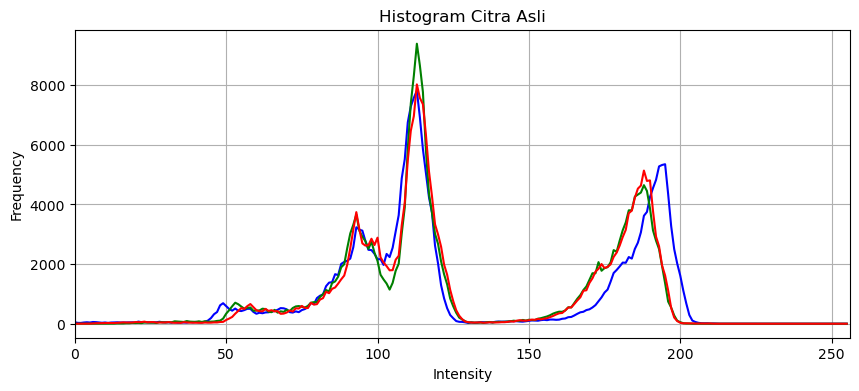

In [14]:
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 4))
plt.title('Histogram Citra Asli')
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()